In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [5]:
np.random.seed(42)


In [6]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [7]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=1.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()
loss_func = FocalLoss(gamma=2.)

In [8]:
src = (ImageList.from_folder(path='train',include=["class-811","class-394","class-526","class-4","class-536","class-204"]).split_by_rand_pct(0.2).label_from_folder())

In [9]:
src

LabelLists;

Train: LabelList (13359 items)
x: ImageList
Image (3, 1500, 2000),Image (3, 1500, 2000),Image (3, 2000, 1500),Image (3, 331, 500),Image (3, 500, 375)
y: CategoryList
class-204,class-204,class-204,class-204,class-204
Path: train;

Valid: LabelList (3339 items)
x: ImageList
Image (3, 375, 500),Image (3, 1500, 2000),Image (3, 375, 500),Image (3, 800, 600),Image (3, 500, 375)
y: CategoryList
class-204,class-204,class-536,class-536,class-204
Path: train;

Test: None

In [10]:
data = src.transform(tfms,size=(512,512)).databunch(bs=4).normalize(imagenet_stats)

In [11]:
data.c

6

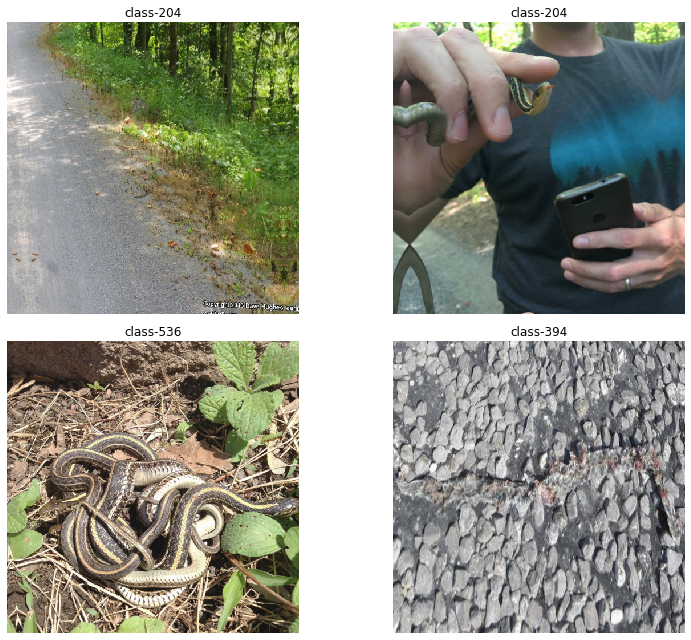

In [12]:
data.show_batch(rows=3, figsize=(12,9))

In [13]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func)


In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


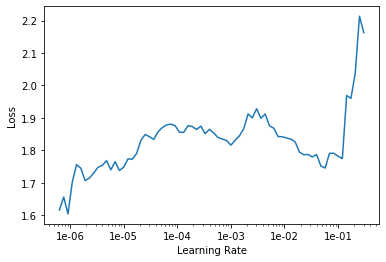

In [15]:
learn.recorder.plot()

In [16]:
lr=1e-2

In [17]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,0.712882,2.636122,0.371069,0.628931,0.139909,27:06


KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

In [ ]:
learn.fit_one_cycle(2,slice(1e-6,lr/10))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


In [ ]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60,normalize=True)

In [ ]:
interp.most_confused(min_val=2)


In [ ]:
data.c

In [ ]:
data.batch_stats

In [ ]:
data.stats

In [ ]:
len(data.train_ds)